In [1]:
import sys
sys.path.append("..")

In [2]:
from hpst.dataset.heterogenous_sparse_dataset import HeterogenousSparseDataset
import torch
import torchvision.transforms.functional as F
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
dataset = HeterogenousSparseDataset("../data/preprocessed_nova_miniprod6_1_cvnlabmaps.h5")

loading file
1
1.1
2
3
4
processing file


In [5]:
print(len(dataset))

4623080


In [48]:
hits_index, (
            features_x,
            coordinates_x,
            targets_x,
            object_targets_x
        ), (
            features_y,
            coordinates_y,
            targets_y,
            object_targets_y
        ) = dataset[21]

In [49]:
object_targets_x

tensor([ 1,  1,  1,  1,  6,  6,  1,  1,  3, 14,  4,  4,  5,  7,  5,  5,  0,  0,
         2,  0,  0,  0, 10,  2,  2,  0, 10,  2,  2,  0,  0, 10, 10,  2,  0, 10,
         2,  2,  2,  8, 15, 11, 16,  9])

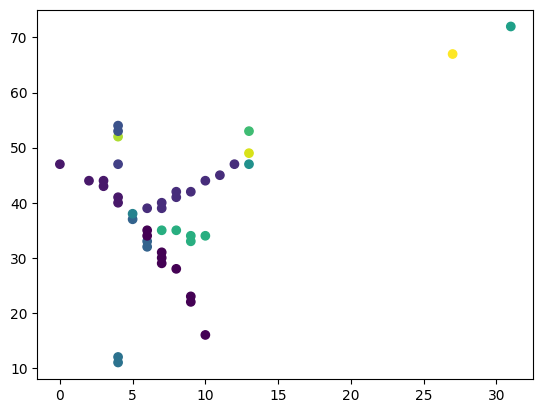

In [50]:
plt.scatter(coordinates_x.numpy()[:,0], coordinates_x.numpy()[:,1], c=object_targets_x)

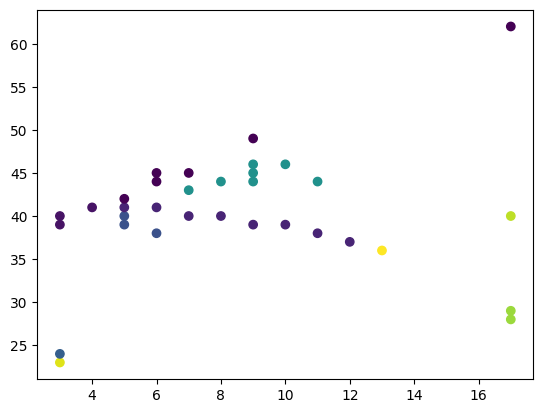

In [51]:
plt.scatter(coordinates_y.numpy()[:,0], coordinates_y.numpy()[:,1], c=object_targets_y)

In [61]:
mat_x = torch.sparse_coo_tensor(
        coordinates_x.T,
        object_targets_x+1,
        size=(100,80)
    ).to_dense()

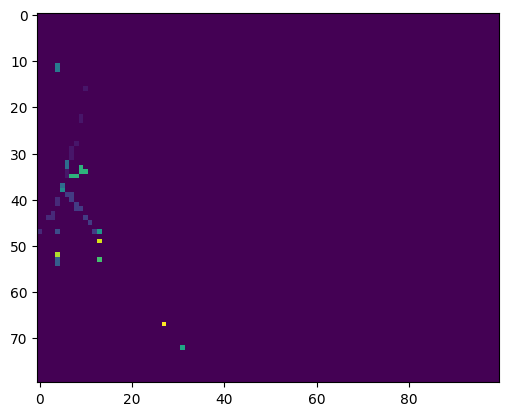

In [62]:
plt.imshow(mat_x.numpy().T)

In [63]:
feat_mat_x = torch.sparse_coo_tensor(
        coordinates_x.T,
        features_x.squeeze(-1),
        size=(100,80)
    ).to_dense()

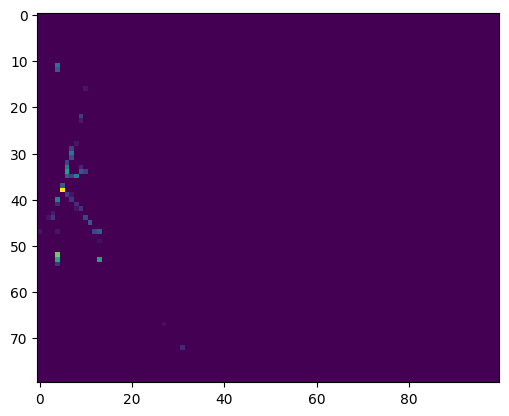

In [64]:
plt.imshow(feat_mat_x.T)

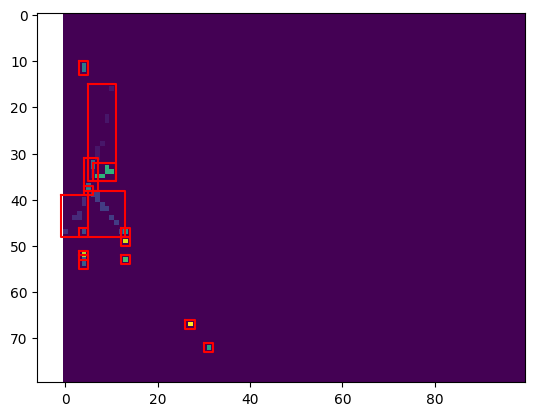

In [65]:
fig, ax = plt.subplots()
ax.imshow(mat_x.T)
for i in object_targets_x.unique():
    coords = coordinates_x[object_targets_x == i]
    lo = coords.amin(dim=0)-1
    hi = coords.amax(dim=0)+1
    
    #rect = patches.Rectangle((lo[0], lo[1]), hi[0]-lo[0], hi[1]-lo[1], linewidth=1, edgecolor='r', facecolor='none')
    #ax.add_patch(rect)
    xs = [lo[0], hi[0], hi[0], lo[0], lo[0]]
    ys = [lo[1], lo[1], hi[1], hi[1], lo[1]]
    ax.plot(xs, ys, color="red")

plt.show()

In [57]:
hits_index

21